<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot data</a></span><ul class="toc-item"><li><span><a href="#Approximation-ratio" data-toc-modified-id="Approximation-ratio-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Approximation ratio</a></span></li></ul></li></ul></div>

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import qtensor

# Heuristic plot Approximation Ratio vs p

In [48]:
from zipfile import ZipFile
import collections
mpl.rcParams.update({'font.size': 16})

NMAX = 2500

## Read data

In [4]:
DATA_FILE = '../data/graph_ensemble_data2.zip'

In [10]:
def load_heuristic_ar_data(zipfile):
    zippy = ZipFile(zipfile,'r')
    datacollection = collections.defaultdict(lambda :[])
    for fname in [q.filename for q in zippy.filelist][1::]:

        fil = zippy.open(fname)
        dat = json.load(fil)

        for key in dat['values'].keys():
            datacollection[key] += [dat['values'][key]]

    if len(datacollection)>NMAX: # Some glue to fix an off-by-one error
        datacollection = {a:datacollection[a] for a in list(datacollection.keys())[0:NMAX]}

    zippy.close()
    return datacollection

datacol = load_heuristic_ar_data(DATA_FILE)
print('Loaded {:0.0f} graphs!'.format(len(datacol)))

Loaded 2500 graphs!


In [14]:
def parse_heursitic_ar_data(datacollection):
    """
    Returns:
        AR (numpy.array of shape (11, NMAX)): Approximation ratio, optimal cost/qaoa_cost
        PR (numpy.array of shape (11, NMAX)): Performance ratio, GW cost/qaoa_cost
    """

    AR = np.zeros([11,len(datacollection)])
    PR = np.zeros([11,len(datacollection)])
    for p in range(1,12):
        for ctr,graph in enumerate(datacollection.values()):
            AR[p-1,ctr] = graph[0][str(p)]/graph[0]['0']
            PR[p-1,ctr] = graph[0][str(p)]/graph[0]['-1']

    return AR, PR

In [15]:
AR, PR = parse_heursitic_ar_data(datacol)

In [16]:
def get_guarantees(ps=range(1, 12), degree=3):
    guarantees = [qtensor.tools.BETHE_QAOA_VALUES[str(p)]['val'] for p in ps]
    return guarantees

In [18]:
guarantees = get_guarantees(ps=range(1, 12), degree=3)

## Plot data

In [66]:
def get_colors(offset=0.25, cmap=mpl.cm.gnuplot2):
    """
    returns:
        primary, secondary: colors to use in plots
    """
    return cmap(offset), cmap(1-offset)

c_prim, c_sec = get_colors(offset=0.25)

In [224]:
from mpl_toolkits.axes_grid1 import Divider, Size

def add_sized_axis(fig, axsize):
    # The first items are for padding and the second items are for the axes.
    # sizes are in inch.
    h = [Size.Fixed(1.0), Size.Fixed(axsize[0]), Size.Fixed(.5)]
    v = [Size.Fixed(0.7), Size.Fixed(axsize[1])]

    divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
    # The width and height of the rectangle are ignored.

    ax = fig.add_axes(divider.get_position(),
                      axes_locator=divider.new_locator(nx=1, ny=1))

### Approximation ratio


In [233]:
def plot_ar(x, data, c_prim, c_sec, alpha=0.15, axsize=(6, 6/1.618)):
    fig = plt.figure(figsize=(axsize[0]+1.5, axsize[1]+.8))
    add_sized_axis(fig, axsize)
    #plt.subplots_adjust(left=0.15,right=0.85)

    mi = data.min(1)
    av = np.average(data, 1)
    ma = data.max(1)


    plt.plot(x, av,'o-', label='Average', color=c_prim)
    #plt.plot(np.arange(1,12),maxAR,'.-',label='Max', color=c_prim)
    #plt.plot(np.arange(1,12),minAR,'.-', label='Minimum', color=c_prim)
    plt.fill_between(x, mi, ma, color=c_prim, alpha=alpha, label='Value range')

    plt.plot(x, guarantees,'o-',label='$\\nu=3$ Guarantee', color=c_sec)

    #plt.axis([1,11,0.6,1.005])
    ax = plt.gca()
    ax.set_xticks(np.arange(1,12))
    plt.xlabel('p')
    plt.ylabel('Approximation ratio')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    return fig

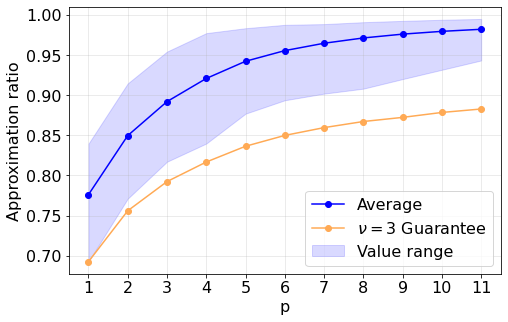

In [234]:
plot_ar(np.arange(1, 12), AR, c_prim=c_prim, c_sec=c_sec)
plt.savefig('../plots/pdf/ar_vs_p.pdf')

In [235]:
def plot_pr(x, data, c_prim, c_sec, alpha=0.15, axsize=(6, 6/1.618)):
    margin = (0.2, 0.2)
    fig = plt.figure(figsize=(axsize[0]+1.5, axsize[1]+.8))
    add_sized_axis(fig, axsize)
    #plt.subplots_adjust(left=0.15,right=0.85)

    mi = data.min(1)
    av = np.average(data,1)
    ma = data.max(1)


    plt.plot(x, av,'o-', label='Average', color=c_prim)
    #plt.plot(np.arange(1,12),maxAR,'.-',label='Max', color=c_prim)
    #plt.plot(np.arange(1,12),minAR,'.-', label='Minimum', color=c_prim)
    plt.fill_between(x, mi, ma, color=c_prim, alpha=alpha, label='Value range')

    plt.hlines(min(x), max(x), 1, color=c_sec, linestyle='--')

    #plt.axis([1,11,0.6,1.005])
    ax = plt.gca()
    ax.set_xticks(np.arange(1,12))
    plt.xlabel('p')
    plt.ylabel('Performance ratio')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    print(plt.gca().dataLim.bounds)
    return fig

(1.0, 0.6924500897281322, 10.0, 0.380310419582358)


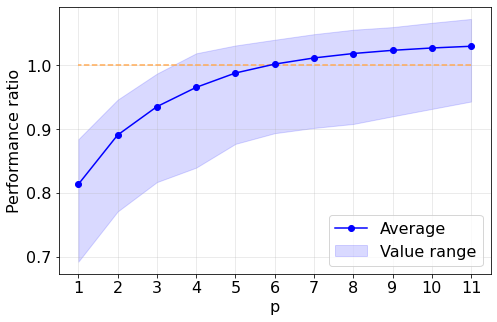

In [236]:
fig = plot_pr(x, PR, c_prim=c_prim, c_sec=c_sec)
plt.savefig('../plots/pdf/pr_vs_p.pdf')